**EMAIL SPAM DETECTION USING NLP**

The main motto of this project is to detect whether the email text is spam or not based on the text message provided to us.

**1. GET THE DATA**

In [1142]:
# import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1143]:
# read and load the dataset

data = pd.read_csv('/content/spam.csv', encoding = 'latin-1')

In [1144]:
# load the first five rows of the dataset

print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [1145]:
# load the last five rows of the dataset

print(data.tail())

        v1                                                 v2 Unnamed: 2  \
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  


In [1146]:
# shape of the dataset

print(data.shape)

(5572, 5)


# PROCESS INVOLVED IN THE EMAIL SPAM DETECTION ⁉

## 1. Data cleaning
## 2. EDA
## 3. Text Preprocessing
## 4. Model building
## 5. Evaluation
## 6. Improvement
## 7. Website
## 8. Deploy

## 1. DATA CLEANING:

In [1147]:
# get the informtion about all the columns in the dataset

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


# OBSERVATION:

(i) The above data shows that there are three unused columns in the dataset.

In [1148]:
# get all the columns from the dataset

print(data.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [1149]:
# drop all the unused columns from the dataset

data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [1150]:
# get the first five rows of the dataset

print(data.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [1151]:
# rename the column names in the dataset

data.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)

In [1152]:
# get the first five rows of the dataset

print(data.head())

  target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [1153]:
# perform encoding on the target values to convert categorical into numbers so that it can be easily trained by the model

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [1154]:
data['target'] = encoder.fit_transform(data['target'])

In [1155]:
# get the first five rows of the dataset

print(data.head())

   target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


In [1156]:
# check for the missing values in the dataset

print(data.isnull().sum())

target    0
text      0
dtype: int64


# OBSERVATIONS:

(i) There are no missing values in the dataset.

In [1157]:
# check for duplicate values

print(data.duplicated().sum())

403


In [1158]:
# remove the duplicate values
data.drop_duplicates(inplace=True)

In [1159]:
# check for duplicate values

print(data.duplicated().sum())

0


# OBSERVATIONS:

(i) There are no duplicate values in the dataset.

In [1160]:
# shape of the dataset

print(data.shape)

(5169, 2)


In [1161]:
# Count of all the 'Ham' and 'Spam' messages in the dataset

print(data['target'].value_counts())

target
0    4516
1     653
Name: count, dtype: int64


# OBSERVATIONS:

(i)  As there are more number of 'Ham' messages than the 'Spam', so this indicates that it is an imbalanced dataset.

# 2. EDA

In [1162]:
# Count of all the 'Ham' and 'Spam' messages in the dataset

print(data['target'].value_counts())

target
0    4516
1     653
Name: count, dtype: int64


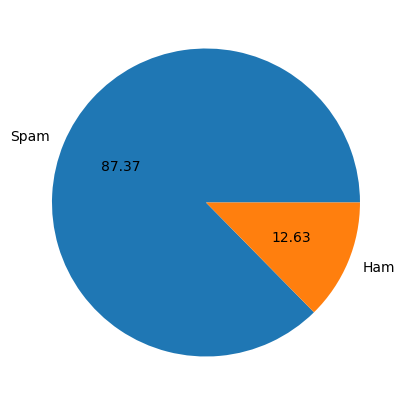

In [1163]:
# Get the plotting of all the 'Ham' and 'Spam' Messages

plt.figure(figsize=(18,5))
plt.pie(data['target'].value_counts(), labels=['Spam','Ham'], autopct = '%0.2f')
plt.show()

# OBSERVATIONS:


(i) From the above graphical representation, it is seen that 88% of the messages are '**Spam**' and 12% of the messages are '**Ham**. So this indicates that the datset is imbalanced.

In [1164]:
import nltk

In [1165]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1166]:
# find out the length of the characters for every text and create a column for it

data['num_characters'] = data['text'].apply(len)

In [1167]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [1168]:
# find out the length of the words for every text and create a column for it

nltk.download('punkt_tab')

data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [1169]:
data.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [1170]:
# find out the length of the sentences for every text and create a column for it

nltk.download('punkt_tab')

data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [1171]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [1172]:
# Get the statistical summary for total number of characters, words and sentences

data[['num_characters',	'num_words'	,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [1173]:
# Get the statistical summary for total number of characters, words and sentences for 'Ham' Messages

data[data['target']==0][['num_characters',	'num_words',	'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [1174]:
# Get the statistical summary for total number of characters, words and sentences for 'Spam' Messages

data[data['target']==1][['num_characters',	'num_words',	'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [1175]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

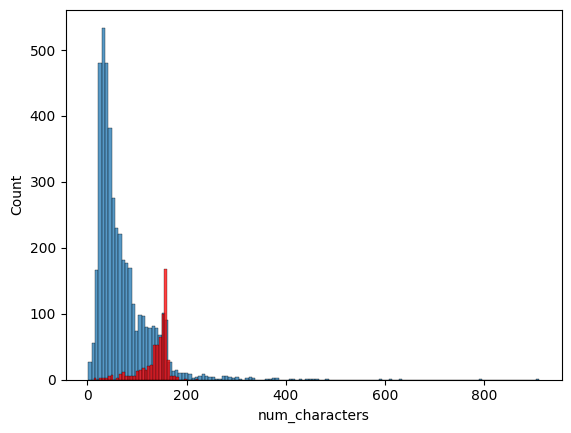

In [1176]:
sns.histplot(data[data['target']==0]['num_characters']) # Ham Mesages

sns.histplot(data[data['target']==1]['num_characters'], color='red') # Spam Mesages

<Axes: xlabel='num_words', ylabel='Count'>

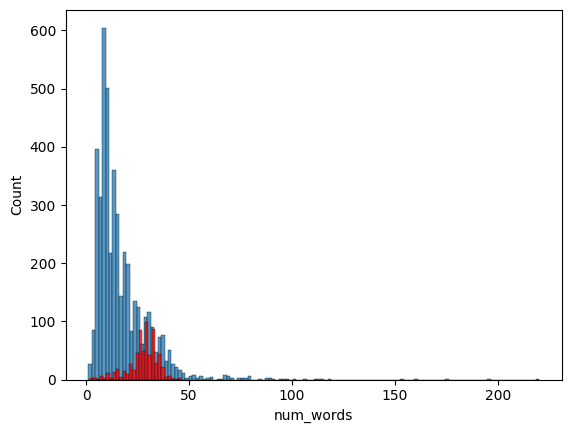

In [1177]:
sns.histplot(data[data['target']==0]['num_words']) # Ham Mesages

sns.histplot(data[data['target']==1]['num_words'],color='red') # Spam Mesages

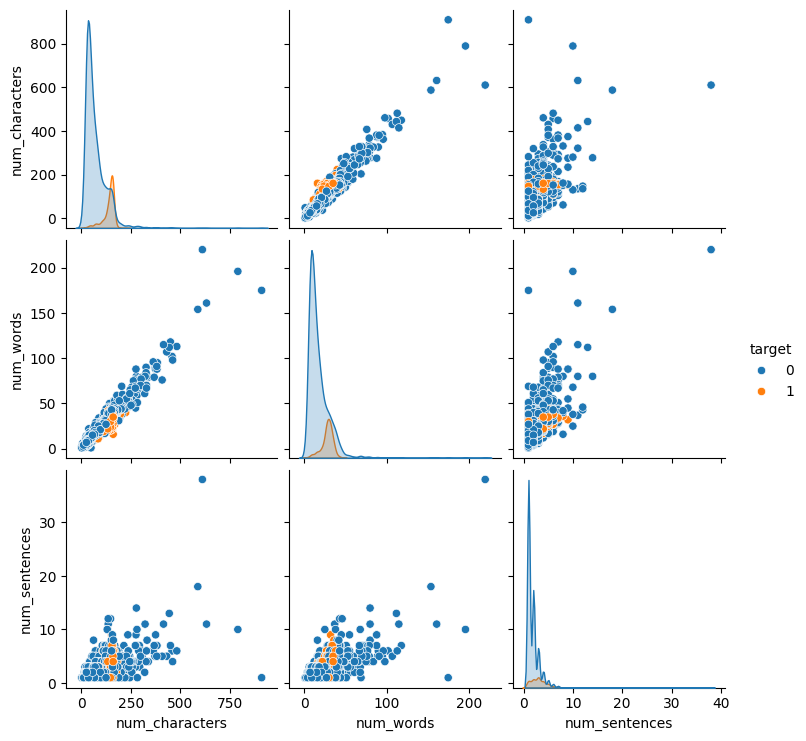

In [1178]:
# Correlation between all the columns

sns.pairplot(data,hue='target')

<Axes: >

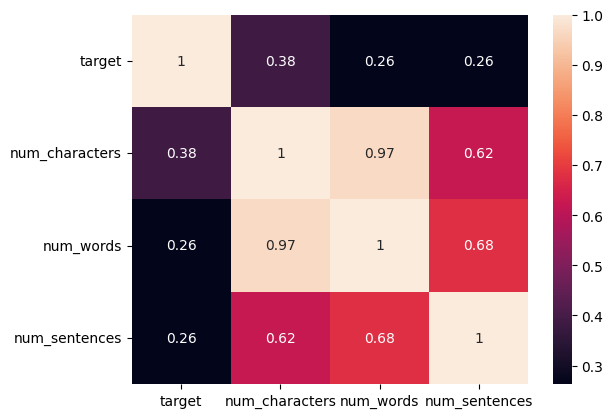

In [1179]:
x= data[['target','num_characters',	'num_words',	'num_sentences']]

sns.heatmap(x.corr(), annot=True)

# 3. Data Preprocessing
1.  Lower case

2.  Tokenization

3.  Removing special characters

4.  Removing stop words and punctuation

5.  Stemming

In [1180]:
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1181]:
# define the function for preprocessing the text

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  # remove special characters
  y = []
  for i in text:
    if(i.isalnum()):
      y.append(i)

  text = y[:]
  y.clear()


  # remove stop words and punctuation
  y = []
  for i in text:
    if(i not in stopwords.words('english') and i not in string.punctuation):
      y.append(i)

  text = y[:]
  y.clear()


  # Perform Stemming
  y=[]
  for i in text:
    y.append(ps.stem(i))

  return(" ".join(y))



In [1182]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [1183]:
data['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [1184]:
ps.stem('loving')

'love'

In [1185]:
data['transformed_text']=data['text'].apply(transform_text)

In [1186]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# USE WORD CLOUD TO GENERATE THE MOST FREQUENT USED SPAM WORDS:

In [1187]:
from wordcloud import WordCloud

# create an object for Word Cloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [1188]:
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

In [1189]:
spam_wc

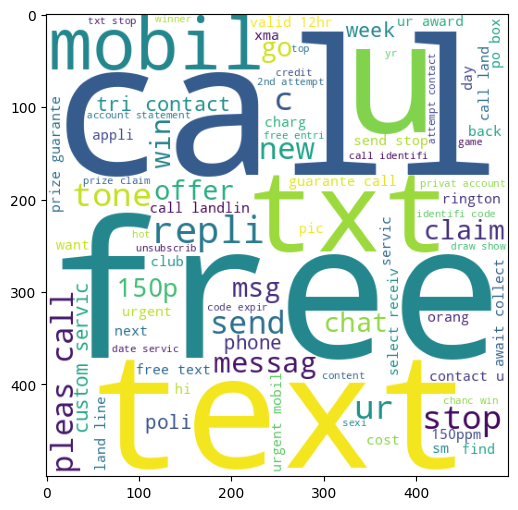

In [1190]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

# USE WORD CLOUD TO GENERATE THE MOST FREQUENT USED HAM WORDS:

In [1191]:
from wordcloud import WordCloud

# create an object for Word Cloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [1192]:
spam_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

In [1193]:
spam_wc

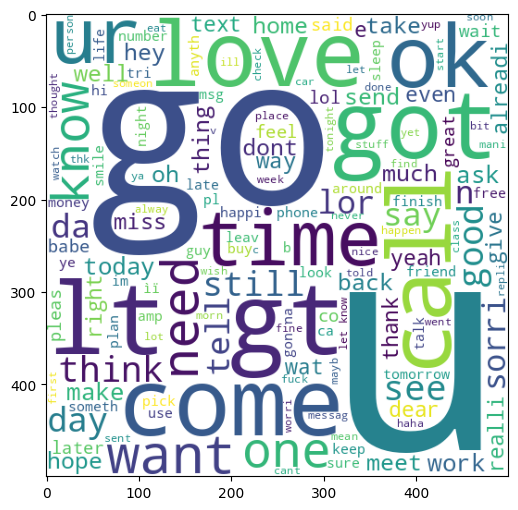

In [1194]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [1195]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [1196]:
spam_corpus=[]

for msg in data[data['target']==1]['transformed_text'].to_list():
  for word in msg.split():
    spam_corpus.append(word)

In [1197]:
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

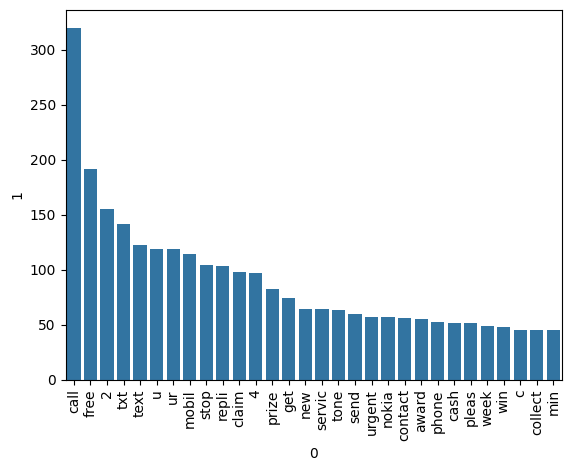

In [1198]:
from collections import Counter


sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])


plt.xticks(rotation='vertical')

plt.show()

# OBSERVATIONS:

(i) This is the graphical representation of the most common 30 spam words.

In [1199]:
spam_corpus=[]

for msg in data[data['target']==0]['transformed_text'].to_list():
  for word in msg.split():
    spam_corpus.append(word)

In [1200]:
print(spam_corpus)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'thatåõ', 'way', 'u', 'feel', 'thatåõ', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', '2', 'month', 'ha', 

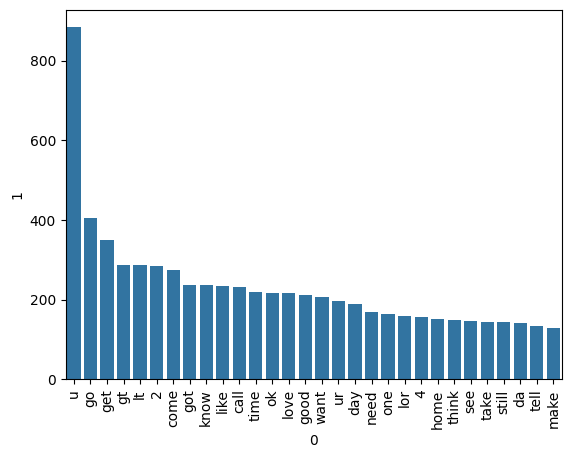

In [1201]:
from collections import Counter


sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])


plt.xticks(rotation='vertical')

plt.show()

# OBSERVATIONS:

(i) This is the graphical representation of the most common 30 ham words.

In [1202]:
# using Bag of Words
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. MODEL BUILDING:

In [1203]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# create an object for Count Vectorizer and TfidfVectorizer

cv = CountVectorizer()

tfidf = TfidfVectorizer(max_features=3000)

In [1204]:
X=tfidf.fit_transform(data['transformed_text']).toarray()

In [1205]:
X  # convert the transformed text into vectors using tfidf vectorizer

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1206]:
Y = data['target'].values

In [1207]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [1208]:
X.shape

(5169, 3000)

# APPLY NAIVE BAYES , GAUSSIAN NAIVE BAYES, BERNOULLI NAIVE BAYES

In [1209]:
# split the dataset into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [1210]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics     import accuracy_score,confusion_matrix,precision_score

In [1211]:
# create the objects for GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [1212]:
# train and predict the model for GaussianNB and find it's accuracy score

gnb.fit(X_train, Y_train)

# predict the model
y_pred1 = gnb.predict(X_test)

print(y_pred1)


print(accuracy_score(Y_test, y_pred1)*100.0)
print(confusion_matrix(Y_test, y_pred1))
print(precision_score(Y_test, y_pred1))

[0 1 1 ... 0 0 0]
86.94390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [1213]:
# train and predict the model for MultinomialNB and find it's accuracy score

mnb.fit(X_train, Y_train)

# predict the model
y_pred2 = mnb.predict(X_test)

print(y_pred2)


print(accuracy_score(Y_test, y_pred2)*100.0)
print(confusion_matrix(Y_test, y_pred2))
print(precision_score(Y_test, y_pred2))

[0 0 0 ... 0 0 0]
97.09864603481626
[[896   0]
 [ 30 108]]
1.0


In [1214]:
# train and predict the model for BinomialNB and find it's accuracy score

bnb.fit(X_train, Y_train)

# predict the model
y_pred3 = bnb.predict(X_test)

print(y_pred3)


print(accuracy_score(Y_test, y_pred3)*100.0)
print(confusion_matrix(Y_test, y_pred3))
print(precision_score(Y_test, y_pred3))

[0 0 0 ... 0 0 0]
98.35589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


# tfidf --> MNB

In [1215]:
# import the libraries for all the algorithms used

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [1216]:
# creating the objects for all the Algorithms used

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [1217]:
# create a dictionary that contains all the objects for all the algorithms used

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [1218]:
def train_classifier(clf, X_train, X_test, Y_train, Y_test):
  # train the model
  clf.fit(X_train, Y_train)
  # predict the model
  y_pred = clf.predict(X_test)
  # print the accuracy score
  accuracy = accuracy_score(Y_test, y_pred)
  precision = precision_score(Y_test, y_pred)


  return accuracy, precision

In [1219]:
train_classifier(svc, X_train, X_test, Y_train, Y_test)

(0.9758220502901354, 0.9747899159663865)

In [1220]:
# create an empty list that stores all the accuracy scores and precision scores

accuracy_scores = []
precision_scores = []

for name, classifiers in clfs.items():
  current_accuracy, current_precision = train_classifier(classifiers, X_train, X_test, Y_train, Y_test)

  print("For ", name)
  print("Accuracy - ", current_accuracy)
  print("Precision - ", current_precision)


  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [1221]:
# Store all the algorithms in decreasing order of precision.

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [1222]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


# OBSERVATIONS:

(i) We have seen that KNN, Naive Bayes, Random Forest, Support Vector Machines are the algorithms that has the highest level of precision.

In [1223]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [1224]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


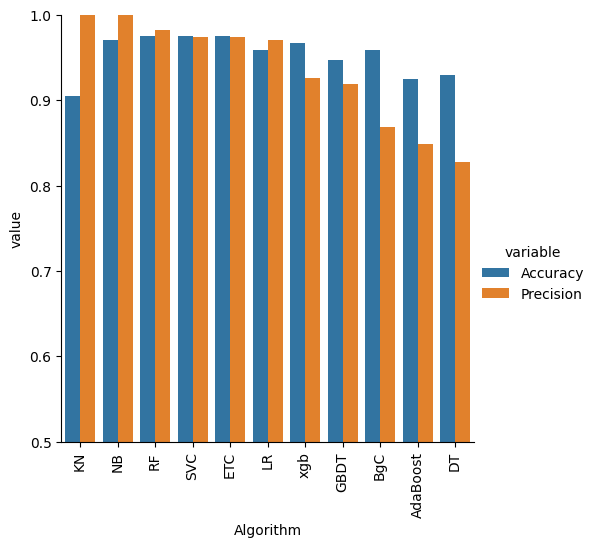

In [1225]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# OBSERVATIONS:

(i) From the graphical representations, it is seen that KN, Naive Bayes, Random Forest, Support Vector Machines are the algorithms that has the highest level of precision.

# 4. MODEL IMPROVEMENT:

In [1226]:
# Store all the algorithms in decreasing order of precision.

temp_df_3000 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [1227]:
temp_df_3000

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [1228]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_Scaling':accuracy_scores,'Precision_Scaling':precision_scores}).sort_values('Precision_Scaling',ascending=False)

In [1229]:
temp_df

,Algorithm,Accuracy_Scaling,Precision_Scaling
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [1230]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [1231]:
# new_df = performance_df.merge(temp_df_3000,on='Algorithm')

In [1232]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_Scaling,Precision_Scaling
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.926230,0.967118,0.926230
7,GBDT,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.848837,0.924565,0.848837


In [1233]:
new_df_scaled = new_df.merge(temp_df_3000,on='Algorithm')

In [1234]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_Scaling,Precision_Scaling,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837


In [1235]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [1236]:
temp_df

,Algorithm,Accuracy_num_chars,Precision_num_chars
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [1237]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_Scaling,Precision_Scaling,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,AdaBoost,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837,0.924565,0.848837


# OBSERVATIONS:

(i) All the Accuracies and Precisions of all the algorithms looks the same.

In [1238]:
# Voting Classifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [1239]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting = 'soft')

In [1240]:
# train the model

voting.fit(X_train, Y_train)


mnb.fit(X_train,Y_train)

MultinomialNB()

In [1241]:
# predict the model

y_pred = voting.predict(X_test)

In [1242]:
print("Accuracy",accuracy_score(Y_test,y_pred)*100.0)
print("Precision",precision_score(Y_test,y_pred))

Accuracy 98.16247582205028
Precision 0.9917355371900827


In [1243]:
# Stacking Classifier

# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [1244]:
from sklearn.ensemble import StackingClassifier

In [1245]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [1246]:
# train the model
clf.fit(X_train, Y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [1247]:
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred)*100.0)
print("Precision",precision_score(Y_test,y_pred))

Accuracy 97.87234042553192
Precision 0.9393939393939394


# OBSERVATIONS:

(i) The accuracy score between the Voting Classifier and Stacking Classifier is the same. But the precision level for Voting Classifier is higher than Stacking Classifier.

In [1248]:
import pickle
# dump the objects into the file
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))